# Single Layer Neural Network Example

Builds a simple neural network with TensorFlow 2.0 eager execution ([code](https://github.com/michaelmendoza/learning-tensorflow/blob/master/examples/mnist/basic-net.py))

### MNIST Dataset Overview

The MNIST database is a large dataset of handwritten digits used for training image processing algorthms. This data set has 50,000 training example images, and 10,000 testing images. Each image has been flatted from an array of size (28,28) to a 1-D numpy array with 784 features (28 * 28). 

### Code Overview

1. Import Libraries
2. Load Data
3. Create Tensorflow Computation Graph:
    1. Create Network Varibles and Placeholders
    2. Create Network Architecture
    3. Define Loss Function and Optimizer
    4. Create Model Evalution Function
4. Run Tensorflow Computation Graph
    1. Initize TF Session
    2. Train Network
    3. Test Network
5. Plot Accuracy Results

## Example Code

import libraries

In [1]:
from __future__ import absolute_import, division, print_function
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Set training and network parameters

In [2]:
# Training Parameters
learning_rate = 0.1
num_epochs = 100
display_step = 10

# Network Parameters
NUM_INPUTS = 784
NUM_OUTPUTS = 10

Import mnist data and preprocess data

In [3]:
# Import Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train).astype(np.float32)
y_test = tf.keras.utils.to_categorical(y_test).astype(np.float32)
x_train = x_train.reshape(-1, NUM_INPUTS).astype(np.float32)
x_test = x_test.reshape (-1, NUM_INPUTS).astype(np.float32)

Define model

In [4]:
class Model(object):
    def __init__(self):
        self.W = tf.Variable(tf.zeros([NUM_INPUTS, NUM_OUTPUTS]), dtype=tf.float32) # Weights for layer
        self.b = tf.Variable(tf.zeros([NUM_OUTPUTS]), dtype=tf.float32)             # Bias for layer

    def __call__(self, x):
        return tf.nn.softmax(tf.matmul(x, self.W) + self.b)

Define loss function

In [5]:
@tf.function
def loss(y, y_target):
    return tf.reduce_mean(-tf.reduce_sum(y_target * tf.math.log(y), axis=[1]))

Define accuracy

In [6]:
@tf.function
def accuracy(y, y_target):
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_target,1))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))  

Define training step

In [7]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)
    return current_loss

Define test step

In [8]:
@tf.function
def test(model, inputs, outputs):
    predictions = model(inputs)
    accuracy(outputs, predictions)

Create model instance

In [9]:
model = Model()

Train model

In [10]:
# Train model and collect accuracy for plotting 
data = []
epochs = range(num_epochs)
for epoch in epochs:
    current_loss =  train(model, x_train, y_train, learning_rate=0.1)
    acc = accuracy(model(x_test), y_test)
    data.append([epoch, acc])

   

    if(epoch % display_step == 0):
        print('Epoch %2d: training loss=%2.5f test accuracy=%2.5f' % (epoch, current_loss, acc))


Epoch  0: training loss=2.30259 test accuracy=0.68080
Epoch 10: training loss=1.54632 test accuracy=0.79380
Epoch 20: training loss=1.18615 test accuracy=0.81970
Epoch 30: training loss=0.99335 test accuracy=0.83490
Epoch 40: training loss=0.87549 test accuracy=0.84280
Epoch 50: training loss=0.79597 test accuracy=0.85090
Epoch 60: training loss=0.73844 test accuracy=0.85690
Epoch 70: training loss=0.69469 test accuracy=0.86210
Epoch 80: training loss=0.66014 test accuracy=0.86540
Epoch 90: training loss=0.63206 test accuracy=0.86810


Plot Model Accuracy

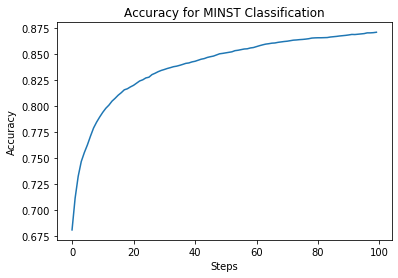

In [11]:
# Plot Accuracy
data = np.array(data)
plt.plot(data.T[0], data.T[1], label="test accuracy")
plt.xlabel("Steps")
plt.ylabel("Accuracy")
plt.title("Accuracy for MINST Classification")
plt.show()